# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import math

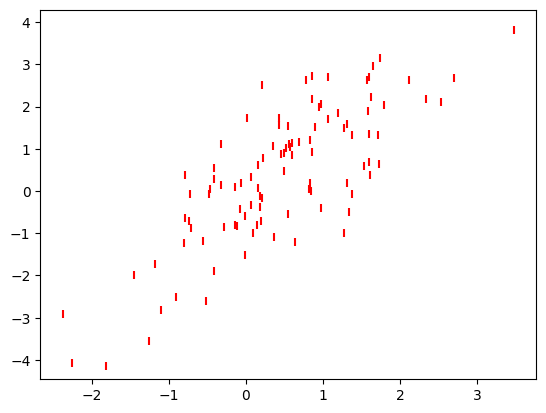

In [14]:
n = np.arange(100)
xx = np.linspace(0, 1, 100) + np.random.randn(100)

fig, axes = plt.subplots()

# Bodový graf
axes.scatter(xx, xx + np.random.randn(len(xx)), marker = 3,color = "red")


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imagesc` a `contour`.


/tmp/ipykernel_2559/3245473705.py:5: RuntimeWarning: invalid value encountered in divide
  Z = (np.sin((X**2 + Y**2) ** 0.5)) / ((X**2 + Y**2) ** 0.5)


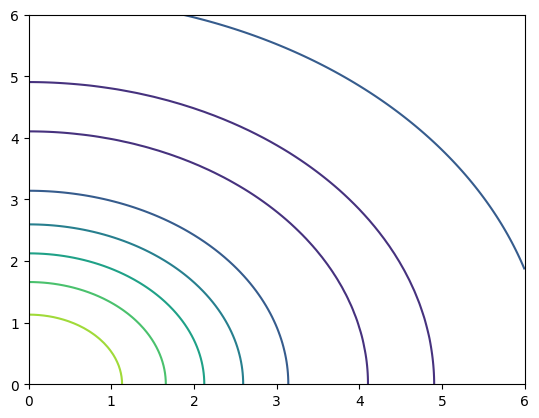

In [18]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = (np.sin((X**2 + Y**2) ** 0.5)) / ((X**2 + Y**2) ** 0.5)
Z = Z.T
fig, ax = plt.subplots()
cnt = plt.contour(X, Y, Z)


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


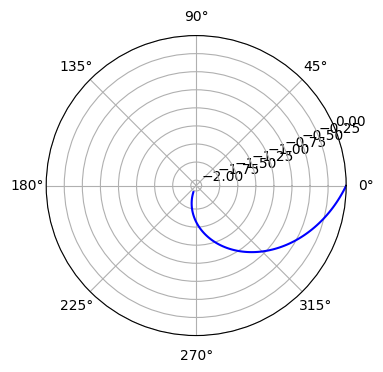

In [34]:
fig = plt.figure(figsize=(5,5))

# Polární souřadnice
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * math.sin(30), 100)

# Jednoduchá spirála
ax.plot(t, t, color='blue')


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


(array([   3.,    5.,   16.,   52.,  111.,  299.,  463.,  796., 1209.,
        1392., 1537., 1417., 1123.,  759.,  438.,  231.,   99.,   36.,
          10.,    4.]),
 array([-4.02872612, -3.64198677, -3.25524742, -2.86850807, -2.48176872,
        -2.09502937, -1.70829002, -1.32155067, -0.93481132, -0.54807197,
        -0.16133262,  0.22540673,  0.61214608,  0.99888543,  1.38562478,
         1.77236413,  2.15910348,  2.54584283,  2.93258218,  3.31932153,
         3.70606088]),
 <BarContainer object of 20 artists>)

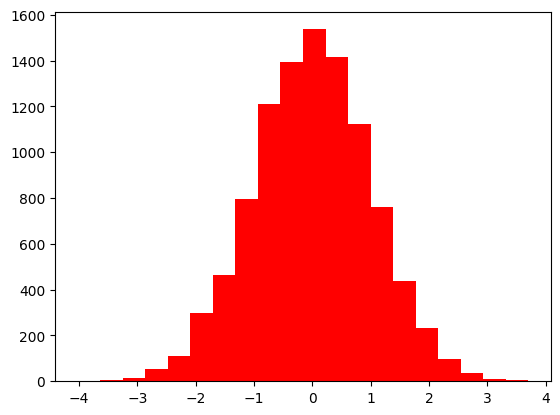

In [25]:
n = np.random.randn(10000)     # Spousta náhodných čísel (norm.rozdělení)
plt.hist(n, 20,color="red")                # Histogram o 20 "binech"


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


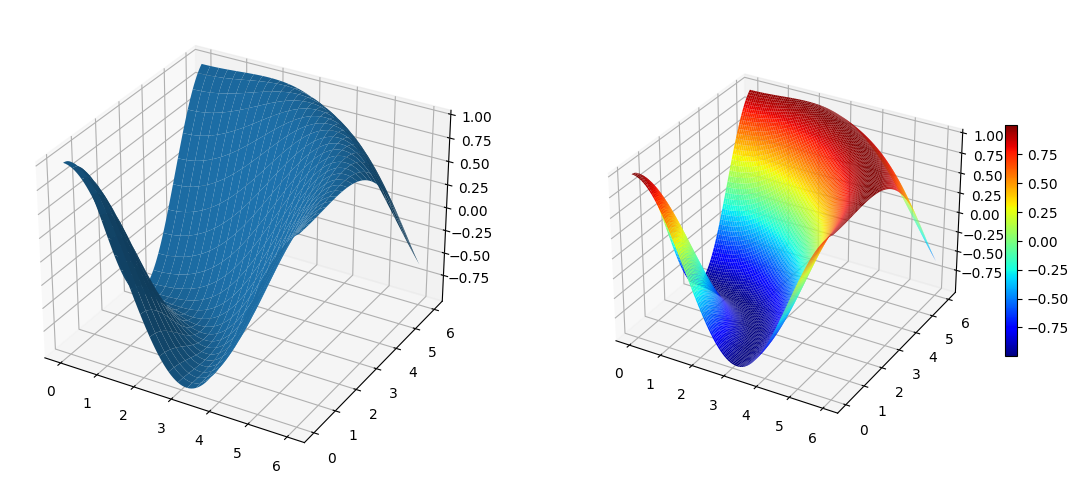

In [50]:
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)
Z = np.cos(((X**2 + Y**2) ** 0.5))
Z= Z.T
fig = plt.figure(figsize=(14,6))
# `ax` je trojrozměrná osa (díky keyword argumentu projection)
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# Povrchový graf s doprovodnou barevnou informací
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="jet", linewidth=0, antialiased=True)
cb = fig.colorbar(p, shrink=0.5)

# Domácí úkol
- Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral` a vykreslete spirálu a její sinus pomocí `imshow` a `contour`.
- měřte časy výpočtu pro různé hodnoty mezi 11 a 1001 a porovnejte je.
- vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů do jednoho grafu.
- nastavte popisky, legendu a osy
- co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 

In [2]:
import time

In [3]:
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    
    B = np.arange(1,n**2+1)
    A = np.zeros([n,n])
    i = -1
    j = -1
    p=n
    while(p>0):
        if(p!=1):
            A[:,j] += np.append(np.zeros((n-p)//2),np.append(B[:(B.size-p-1):-1],np.zeros((n-p)//2)))
            B = B[:(B.size-p)]
        else:
            A[i,j] = 1
        p-=1
        if(p>0):
            A[i,:] += np.append(np.zeros((n-p)//2),np.append(B[(B.size-p):B.size:],np.zeros((n-p)//2+1)))
            B = B[:(B.size-p)]
            i=i*(-1)-1
            j=j*(-1)-1
            A[:,j] += np.append(np.zeros((n-p)//2),np.append(B[(B.size-p):B.size:],np.zeros((n-p)//2+1)))
            B = B[:(B.size-p)]
        p-=1
        if(p>0):
            A[i,:] += np.append(np.zeros((n-p)//2),np.append(B[:(B.size-p-1):-1],np.zeros((n-p)//2)))
            B = B[:(B.size-p)]
        i=i*(-1)-2
        j=j*(-1)-2
    return A

In [4]:
def spiral_graph(n):
    x= np.linspace(0, 10, n)
    y = np.linspace(0, 10, n)   
    X, Y = np.meshgrid(x, y)
    Z = integer_spiral(n)
    Z= Z.T
    #fig, ax = plt.subplots()
    #cnt = plt.contour(X, Y, Z)
    #im = plt.imshow(Z, cmap="gray", vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 10, 0, 10])
def spiral_np_graph(n):
    x= np.linspace(0, 10, n)
    y = np.linspace(0, 10, n)   
    X, Y = np.meshgrid(x, y)
    Z = integer_spiral_numpy(n)
    Z= Z.T
    fig, ax = plt.subplots()
    cnt = plt.contour(X, Y, Z)
    im = plt.imshow(Z, cmap="gray", vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 10, 0, 10])
def spiral_sin_graph(n):
    x= np.linspace(0, 10, n)
    y = np.linspace(0, 10, n)   
    X, Y = np.meshgrid(x, y)
    Z = integer_spiral(n)
    Z= Z.T
    #fig, ax = plt.subplots()
    #cnt = plt.contour(X, Y, np.sin(Z))
    #im = plt.imshow(np.sin(Z), cmap="gray", vmin=0, vmax=1, extent=[0, 10, 0, 10])
def spiral_np_sin_graph(n):
    x= np.linspace(0, 10, n)
    y = np.linspace(0, 10, n)   
    X, Y = np.meshgrid(x, y)
    Z = integer_spiral_numpy(n)
    Z= Z.T
    fig, ax = plt.subplots()
    cnt = plt.contour(X, Y, np.sin(Z))
    im = plt.imshow(np.sin(Z), cmap="gray", vmin=0, vmax=1, extent=[0, 10, 0, 10])


[0.00448442 0.0312686  0.108073   0.23564219 0.35746312 0.54558349
 0.74771929 1.0560534  1.33940816 1.73814702]
[5.94615936e-04 2.76050568e-02 1.26753807e-01 2.35222816e-01
 3.56098652e-01 5.23911476e-01 7.48919249e-01 1.08027959e+00
 1.34055424e+00 1.69809103e+00]


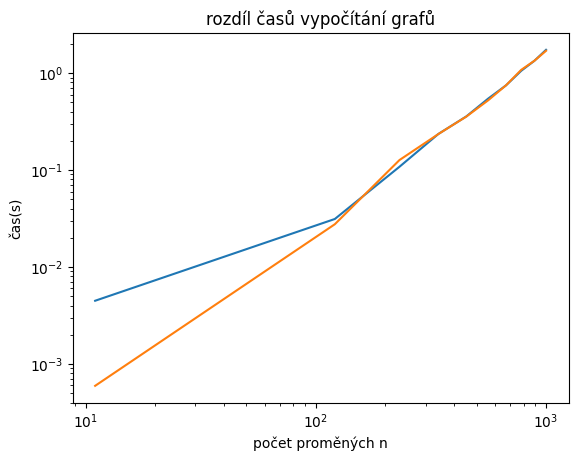

In [15]:
k=10
n = np.linspace(11,1001,k,dtype=int)
casy1 = np.zeros(k)
casy2 = np.zeros(k)
for i in range(k):
    start = time.time()
    spiral_graph(n[i])
    end = time.time()
    casy1[i]=end-start
    start = time.time()
    spiral_sin_graph(n[i])
    end = time.time()
    casy2[i]=end-start
print(casy1)
print(casy2)
fig, ax = plt.subplots(1, 1) 

ax.plot(n, casy1, n, casy2)
ax.set_title("rozdíl časů vypočítání grafů")
ax.set_xlabel("počet proměných n")
ax.set_ylabel("čas(s)")
ax.set_xscale("log")
ax.set_yscale("log")

#sklon lineárního grafu log-log značí že časy běhu těchto funkcí se zvětšujou exponenciálně


# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.